In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import roc_curve
from sklearn import metrics

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold

In [3]:
mrna_x = pd.read_csv('zscore_mutation.csv')
mrna_x.drop(columns=mrna_x.columns[0], axis=1, inplace=True)
print(mrna_x.head())

#mrna_x.drop('target', axis=1, inplace=True)
y = np.load('processed_recurrence_data_zscore_mutation.npy')
print(mrna_x.shape)
X_train, X_test, y_train, y_test = train_test_split(mrna_x.values, y,
                                                    train_size=0.75, test_size=0.25)

age = np.load('age_data_mutation.npy')
gender = np.load('gender_data_mutation.npy')
stage = np.load('stage_data_mutation.npy')

   LOC100130426  UBE2Q2P3  UBE2Q2P3.1  TIMM23  LOC155060  RNU12-2P    SSX9  \
0       -3.0863    0.3223     -0.7343  0.1476     0.9885   -0.1476 -0.9372   
1       -3.0863    1.4031      1.3759 -1.3732     2.0512   -0.5081 -0.9372   
2       -3.0863    1.5672      1.6364  0.4353     0.6953    1.2612 -0.9372   
3       -3.0863    0.9756      1.2166  0.0829     0.2252    0.5166 -0.9372   
4       -3.0863    1.2136      1.5562 -1.1680     0.5609    0.4829 -0.9372   

    EZHIP  EFCAB8  SRP14P1  ...  ZSWIM6 Mutation  ZSWIM8 Mutation  \
0  0.6324  5.0700  -0.2790  ...                0                0   
1 -0.3527 -0.5518   0.4855  ...                0                0   
2 -1.5927  0.2084  -1.5463  ...                0                0   
3 -0.8073 -1.5707  -2.1707  ...                0                1   
4 -1.5927 -1.5707  -1.6107  ...                0                0   

   ZUFSP Mutation  ZW10 Mutation  ZWINT Mutation  ZXDA Mutation  \
0               0              0               0 

In [4]:
ave_r_age = 0
ave_nr_age = 0
r = 0
nr = 0
for i in range(len(age)):
    if y[i] == 0:
        nr = nr + 1
        ave_nr_age = ave_nr_age + age[i]
    else:
        r = r + 1
        ave_r_age = ave_r_age + age[i]

print(ave_r_age/r, ave_nr_age/nr, (ave_nr_age+ave_r_age)/(nr+r))

60.73451327433628 58.10276679841897 58.91530054644809


In [5]:
#age ranges for each condition
age_nor = age[y == 0]
age_r = age[y == 1]


print("Total age range", age.min(), age.max())
print("No recurrance age range", age_nor.min(), age_nor.max())
print("Yes recurrance age range", age_r.min(), age_r.max())



Total age range 26 86
No recurrance age range 26 86
Yes recurrance age range 32 86


In [6]:
num_0_M = np.sum((y == 0) & (gender == 0))
num_0_F = np.sum((y == 0) & (gender == 1))
num_1_M = np.sum((y == 1) & (gender == 0))
num_1_F = np.sum((y == 1) & (gender == 1))

print(num_0_M, num_0_F, num_1_M, num_1_F)


164 89 81 32


In [7]:
counts = {(i, j): np.sum((y == i) & (stage == j)) for i in [0, 1] for j in range(5)}

# Print results
for i in [0, 1]:
    for j in range(5):
        print(f"{i} -> Stage {j}: {counts[(i, j)]}")


0 -> Stage 0: 163
0 -> Stage 1: 32
0 -> Stage 2: 53
0 -> Stage 3: 4
0 -> Stage 4: 1
1 -> Stage 0: 21
1 -> Stage 1: 9
1 -> Stage 2: 36
1 -> Stage 3: 47
1 -> Stage 4: 0


In [8]:
grade = np.load('grade_data_mutation.npy')
ost = np.load('ost_data_mutation.npy')
dfst = np.load('dfst_data_mutation.npy')
surv = np.load('surv_data_mutation.npy')
neoa = np.load('neoa_data_mutation.npy')
prior = np.load('prior_data_mutation.npy')
lat = np.load('lat_data_mutation.npy')

In [9]:
#Grade clincial info
grade_counts = {(i, j): np.sum((y == i) & (grade == j)) for i in [0, 1] for j in range(6)}

# Print results
for i in [0, 1]:
    for j in range(6):
        print(f"{i} -> G{j}: {grade_counts[(i, j)]}")


0 -> G0: 8
0 -> G1: 132
0 -> G2: 98
0 -> G3: 11
0 -> G4: 3
0 -> G5: 1
1 -> G0: 1
1 -> G1: 27
1 -> G2: 47
1 -> G3: 38
1 -> G4: 0
1 -> G5: 0


In [10]:
#Laterality Info
lat_counts = {(i, j): np.sum((y == i) & (lat == j)) for i in [0, 1] for j in range(3)}
for i in [0, 1]:
    for j in range(3):
        print(f"{i} -> Side{j}: {lat_counts[(i, j)]}")


0 -> Side0: 147
0 -> Side1: 106
0 -> Side2: 0
1 -> Side0: 51
1 -> Side1: 62
1 -> Side2: 0


In [11]:
#Prior Info
prior_counts = {(i, j): np.sum((y == i) & (prior == j)) for i in [0, 1] for j in range(2)}
for i in [0, 1]:
    for j in range(2):
        print(f"{i} -> {j}: {prior_counts[(i, j)]}")

0 -> 0: 33
0 -> 1: 220
1 -> 0: 12
1 -> 1: 101


In [12]:
#Neo Info
neoa_counts = {(i, j): np.sum((y == i) & (neoa == j)) for i in [0, 1] for j in range(2)}
for i in [0, 1]:
   for j in range(2):
       print(f"{i} -> {j}: {neoa_counts[(i, j)]}")

0 -> 0: 249
0 -> 1: 4
1 -> 0: 108
1 -> 1: 5


In [13]:
#Survival Status

surv_counts = {(i, j): np.sum((y == i) & (surv == j)) for i in [0, 1] for j in range(2)}
for i in [0, 1]:
   for j in range(2):
       print(f"{i} -> {j}: {surv_counts[(i, j)]}")

0 -> 0: 253
0 -> 1: 0
1 -> 0: 44
1 -> 1: 69


In [14]:
#Survival Months

print({x: ost[y == x].mean() for x in [0,1]})
print(ost.mean())


{0: 48.797391304347826, 1: 49.587699115044245}
49.041393442622955


In [15]:
ost_nor = ost[y == 0]
ost_r = ost[y == 1]


print("Total ost range", ost.min(), ost.max())
print("No recurrance ost range", ost_nor.min(), ost_nor.max())
print("Yes recurrance ost range", ost_r.min(), ost_r.max())

Total ost range 0.23 149.05
No recurrance ost range 0.23 133.84
Yes recurrance ost range 2.27 149.05


In [16]:
print(np.sum(ost_r < 60), "recurrance before 5 years out of", len(ost_r),"patients" )


75 recurrance before 5 years out of 113 patients


In [17]:
#DFS months
dfst = dfst.astype(float)
print({x: dfst[y == x].mean() for x in [0,1]})
print(dfst.mean())

{0: 48.797391304347826, 1: 24.446194690265486}
41.27912568306011


In [18]:

dfst_nor = dfst[y == 0]
dfst_r = dfst[y == 1]


print("Total dfst range", dfst.min(), dfst.max())
print("No recurrance dfst range", dfst_nor.min(), dfst_nor.max())
print("Yes recurrance dfst range", dfst_r.min(), dfst_r.max())
print(np.sum(dfst_r < 60), "recurrance before 5 years out of", len(dfst_r),"patients" )


Total dfst range -11.79 133.84
No recurrance dfst range 0.23 133.84
Yes recurrance dfst range -11.79 123.72
100 recurrance before 5 years out of 113 patients


In [19]:
when_r = ost_r - dfst_r
print("Time before recurrence", when_r.min(), when_r.max())


Time before recurrence -7.489999999999995 123.09


In [20]:
print(np.mean(when_r))

25.141504424778763


In [21]:
print(np.sum(dfst_r <= 60), "patients had recurrance before 5 years out of", len(dfst_r),"patients" )
print(np.sum(dfst_r <= 24), "patient had recurrance before 5 years out of", len(dfst_r),"patients" )



100 patients had recurrance before 5 years out of 113 patients
72 patient had recurrance before 5 years out of 113 patients


In [22]:
#early recurrance things
ost_early_r = ost_r[dfst_r <= 24]
print("Early recurrance ost range", ost_early_r.min(), ost_early_r.max())
print(np.mean(ost_early_r), "average survival")


Early recurrance ost range 2.27 126.18
34.21611111111112 average survival


In [23]:
#Middle recurrance things
ost_mid_r = ost_r[(dfst_r > 24) & (dfst_r < 60)]
print("Mid recurrance ost range", ost_mid_r.min(), ost_mid_r.max())
print(np.mean(ost_mid_r), "average survival")

Mid recurrance ost range 27.0 149.05
68.1075 average survival


In [24]:
#Late recurrance things
ost_late_r = ost_r[dfst_r >= 60]
print("Late recurrance ost range", ost_late_r.min(), ost_late_r.max())
print(np.mean(ost_late_r), "average survival")

Late recurrance ost range 62.81 133.61
94.83384615384615 average survival


Text(0, 0.5, 'Percent of Recurrence Patients (%)')

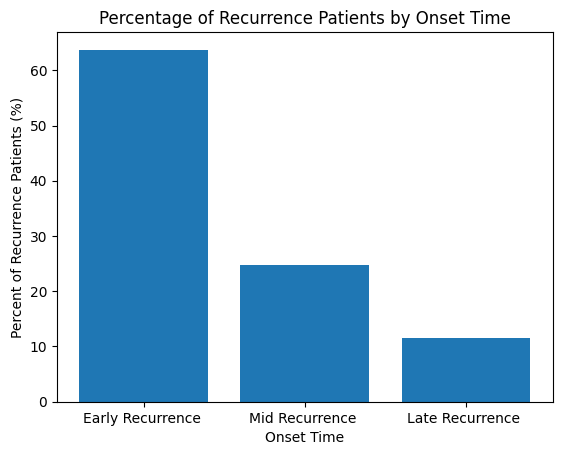

In [25]:
recur_values = [len(ost_early_r)/len(ost_r)*100, len(ost_mid_r)/len(ost_r)*100, len(ost_late_r)/len(ost_r)*100]

plt.bar(['Early Recurrence ', 'Mid Recurrence ', 'Late Recurrence '], recur_values)

# Add title and labels
plt.title('Percentage of Recurrence Patients by Onset Time')
plt.xlabel('Onset Time')
plt.ylabel('Percent of Recurrence Patients (%)')

In [ ]:
ost_r

In [34]:
ost

array([  0.53,  49.05,  48.98,  37.12,  49.54,  48.55,  36.33,  37.35,
        48.78,   4.5 ,  52.89,  45.5 ,  88.3 ,  42.94,  51.22,  10.48,
        28.68,  74.57,  74.7 ,  24.15,  53.25,  43.17,  20.7 ,  18.63,
        18.86,  28.29,  65.47,  20.27, 109.82, 117.71, 122.47, 109.33,
        68.56, 109.43,  94.12,  46.75,  48.32,  78.58,  39.98,  94.22,
        83.15,  28.71,  37.55,  38.37,  82.39,  72.83,  12.12,  40.67,
         1.41,  57.65,  58.41,  15.7 ,  46.55,  16.75,  29.07,  45.27,
         6.7 ,  56.64,  10.28,  65.24,  39.42,  29.01,   2.27,  36.83,
        11.24,  11.89,   7.29,  10.94,  21.85,  62.84,  90.8 ,  30.45,
        58.54,  19.28,  66.  ,  38.6 ,  52.69,  41.85,  52.83,  50.99,
        38.4 ,  48.78,  46.35,  56.93,  42.38, 112.71, 129.57, 133.84,
        15.77,  70.63,  85.71,  86.4 , 119.28, 126.18,  80.85,  71.35,
        73.78, 149.05, 105.29, 123.  , 130.55,  79.83, 131.04,  89.42,
        91.39, 125.95,  32.59,  35.87,  31.93,  21.29,  31.64,  24.8 ,
      